<a href="https://colab.research.google.com/github/YawBoah/MSCAssignments/blob/main/sales_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
import plotly.express as px
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [3]:
df = pd.read_csv('/content/sample_data/Sales_Data.csv')

In [4]:
df.head()

,Date,Store_ID,Product_ID,Product_Category,Quantity_Sold,Sales_Amount,Promotion_Flag,Weather_Condition,Temperature_C
0,2022-01-01,S004,P324,Beverages,12,144.25,No,Rainy,22.3
1,2022-01-01,S004,P124,Household,11,65.19,Yes,Stormy,34.5
2,2022-01-01,S004,P374,Fresh,14,184.55,No,Sunny,22.8
3,2022-01-01,S004,P057,Household,8,195.50,No,Sunny,24.4
4,2022-01-01,S004,P267,Dairy,11,199.61,Yes,Sunny,25.5


In [8]:
print(df.columns)

# Normalize column names
df.columns = df.columns.str.strip().str.lower()

# Ensure 'date' column is datetime
df['date'] = pd.to_datetime(df['date'])

# Group by date and sum total sales across all stores
daily_sales = df.groupby('date')['sales_amount'].sum().reset_index()

# Rename for Prophet
daily_sales.rename(columns={'date': 'ds', 'sales_amount': 'y'}, inplace=True)

daily_sales.head()

Index(['date', 'store_id', 'product_id', 'product_category', 'quantity_sold',
       'sales_amount', 'promotion_flag', 'weather_condition', 'temperature_c'],
      dtype='object')


,ds,y
0,2022-01-01,25745.27
1,2022-01-02,24389.22
2,2022-01-03,27960.30
3,2022-01-04,27376.51
4,2022-01-05,28032.78


In [10]:
model = Prophet(daily_seasonality=True, yearly_seasonality=True)
model.fit(daily_sales)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp8rvg95bt/klexr1x_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8rvg95bt/t31bom9m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30763', 'data', 'file=/tmp/tmp8rvg95bt/klexr1x_.json', 'init=/tmp/tmp8rvg95bt/t31bom9m.json', 'output', 'file=/tmp/tmp8rvg95bt/prophet_modelnjos_a40/prophet_model-20250505193424.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:34:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:34:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [11]:
# Predict for next 30 days
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

# View forecast output
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
1121,2025-01-26,27396.834613,25381.611562,29603.964524
1122,2025-01-27,27339.095990,25326.230576,29440.232495
1123,2025-01-28,27552.524834,25469.235530,29664.250848
1124,2025-01-29,27496.687109,25338.187900,29417.728974
1125,2025-01-30,27314.147178,24855.340350,29202.205575


from matplotlib import pyplot as plt
_df_4['yhat'].plot(kind='hist', bins=20, title='yhat')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5['yhat_lower'].plot(kind='hist', bins=20, title='yhat_lower')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6['yhat_upper'].plot(kind='hist', bins=20, title='yhat_upper')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='yhat', y='yhat_lower', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='yhat_lower', y='yhat_upper', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['ds']
  ys = series['yhat']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('ds', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ds')
_ = plt.ylabel('yhat')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['ds']
  ys = series['yhat_lower']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('ds', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ds')
_ = plt.ylabel('yhat_lower')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['ds']
  ys = series['yhat_upper']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('ds', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ds')
_ = plt.ylabel('yhat_upper')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['ds']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'ds'}, axis=1)
              .sort_values('ds', ascending=True))
  xs = counted['ds']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('ds', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ds')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_13['yhat'].plot(kind='line', figsize=(8, 4), title='yhat')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['yhat_lower'].plot(kind='line', figsize=(8, 4), title='yhat_lower')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['yhat_upper'].plot(kind='line', figsize=(8, 4), title='yhat_upper')
plt.gca().spines[['top', 'right']].set_visible(False)

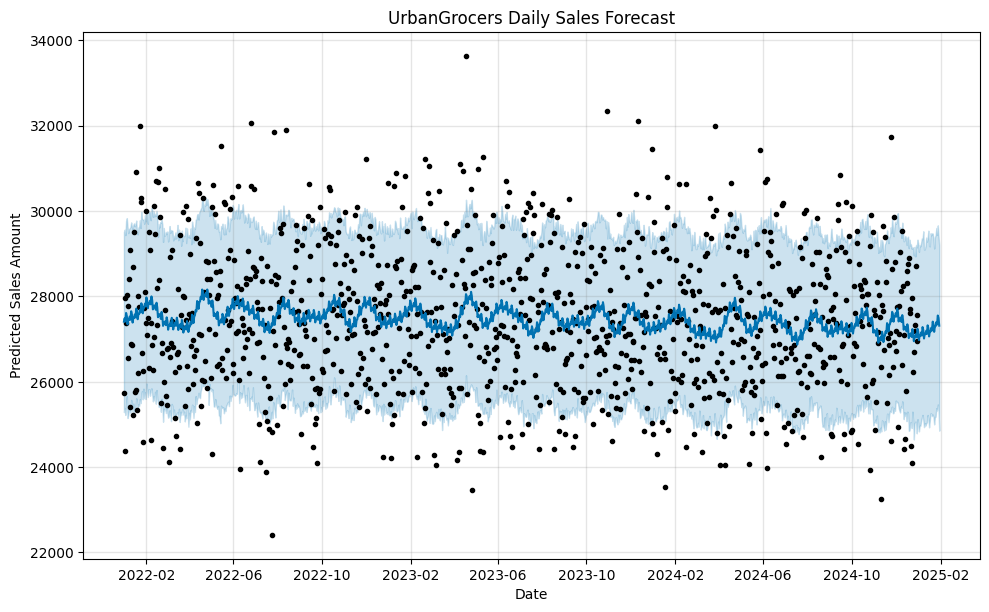

In [12]:
# Forecast plot
fig1 = model.plot(forecast)
plt.title("UrbanGrocers Daily Sales Forecast")
plt.xlabel("Date")
plt.ylabel("Predicted Sales Amount")
plt.show()


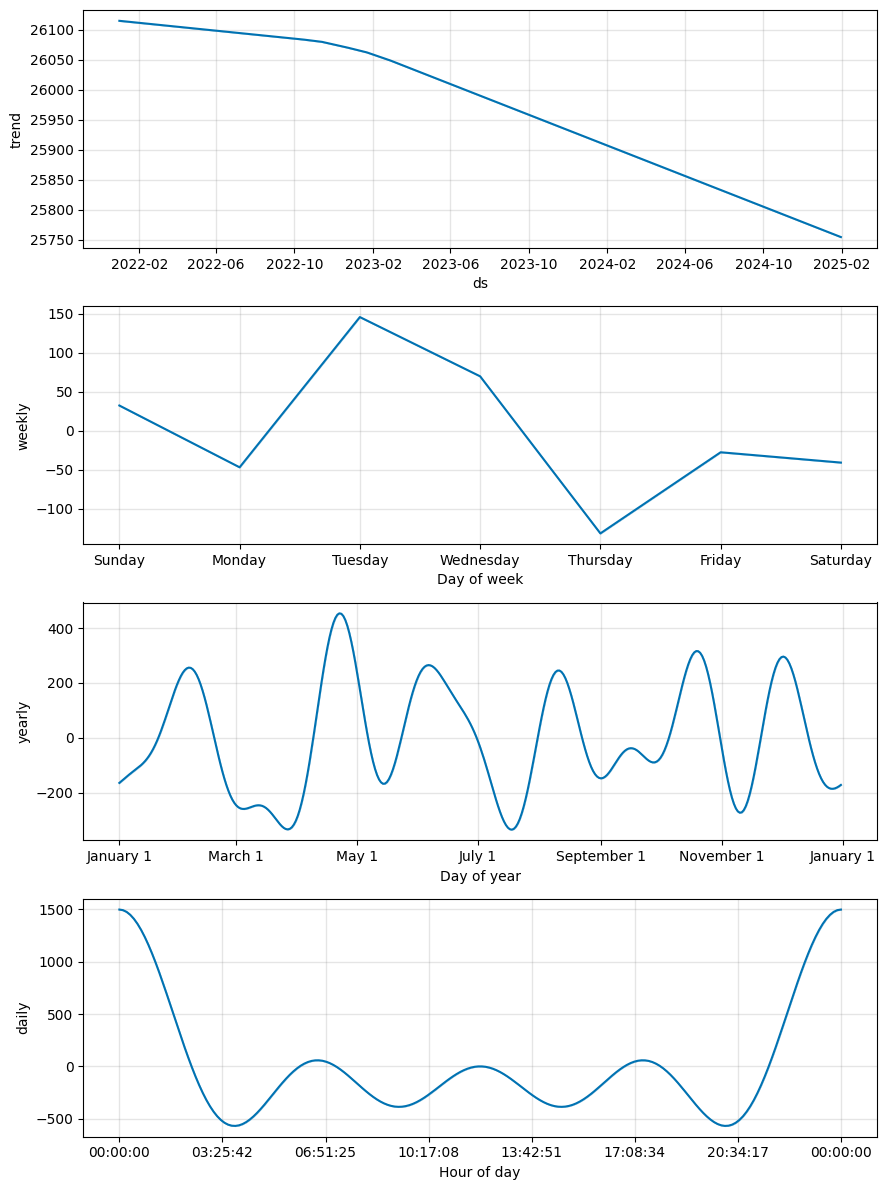

In [13]:
# Components plot (trend, seasonality)
fig2 = model.plot_components(forecast)


In [14]:
# Join actuals and predicted on date
merged = pd.merge(daily_sales, forecast[['ds', 'yhat']], on='ds', how='left')

# Drop future rows without actuals
merged.dropna(inplace=True)

# Calculate metrics
mae = mean_absolute_error(merged['y'], merged['yhat'])
rmse = np.sqrt(mean_squared_error(merged['y'], merged['yhat']))

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Absolute Error (MAE): 1328.21
Root Mean Squared Error (RMSE): 1645.25


In [15]:
# Step 1: Save forecast to CSV
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_csv('urban_grocers_forecast.csv', index=False)
